In [ ]:
# import segmentation_models as sm
# from segmentation_models import Unet
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# plt.style.use('classic')
# #############################################################
# import tensorflow.keras.utils as conv_utils
# from keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
# from keras.layers import Activation, Dropout, Flatten, Dense
# import tensorflow as tf
# #from keras import backend as K



# ####################################################
# import os
# import cv2

# from PIL import Image
# import numpy as np
# import pandas as pd

In [ ]:

# ! pip install git+https://github.com/qubvel/segmentation_models
# ! pip install git+https://github.com/karolzak/keras-unet/tree/master/keras_unet/models
# ! pip install keras-unet
! pip install git+https://github.com/karolzak/keras-unet


  Cloning https://github.com/karolzak/keras-unet to /tmp/pip-req-build-d5nhtwfx
  Running command git clone -q https://github.com/karolzak/keras-unet /tmp/pip-req-build-d5nhtwfx


In [ ]:
from keras_unet.models import custom_unet
import matplotlib.pyplot as plt

import tensorflow.keras.utils as conv_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras_unet.metrics import iou, iou_thresholded
import tensorflow as tf

import os
import cv2

from PIL import Image
import numpy as np
from numpy import asarray
import pandas as pd

# sm.set_framework('tf.keras')

# sm.framework()

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset  = np.zeros([512,512])
label  = np.zeros([512,512])

In [ ]:
image_directory = '/content/drive/MyDrive/Cancer_Dectetin/input/train/'
SIZE = 512


Error = os.listdir(image_directory + 'IMAGE/')
for a in Error:    #Remember enumerate method adds a counter and returns the enumerate object
    image = Image.open(image_directory + 'IMAGE/'+ a) 
    image = image.convert('L') 
    image = image.resize((SIZE,SIZE))
    image = asarray(image)
    image = image/255
    dataset = np.append(dataset,image,axis = 0)

Non_error = os.listdir(image_directory + 'LABEL/')
for a in Non_error:
    image = Image.open(image_directory + 'LABEL/' + a)
    image = image.convert('L') 
    image = image.resize((SIZE,SIZE)) 
    image = asarray(image)
    image = image/255
    # image = image.reshape(512, 512,1)
    label = np.append(label,image,axis = 0)

print(len(dataset))
print(len(label))
print(label.shape)

18432
18432
(18432, 512)


In [ ]:
dataset = dataset.reshape((36,512,512))
label = label.reshape((36,512,512))
print(dataset.shape)
print(label.shape)
dataset = np.delete(dataset,0,0)
label = np.delete(label,0,0)
print(dataset.shape)
print(label.shape)

(36, 512, 512)
(36, 512, 512)
(35, 512, 512)
(35, 512, 512)


In [ ]:
# fig = plt.figure(figsize = (25,100))
# #  Categorical Data
# a = 16  # number of rows
# b = 4  # number of columns
# c = 1  # initialize plot counter
# for i in range(dataset.shape[0]):
#     plt.subplot(a,b,c)
#     plt.imshow(dataset[i])
#     c = c + 1
#     plt.subplot(a,b,c)
#     plt.imshow(label[i])
#     c = c + 1
    
# plt.show()

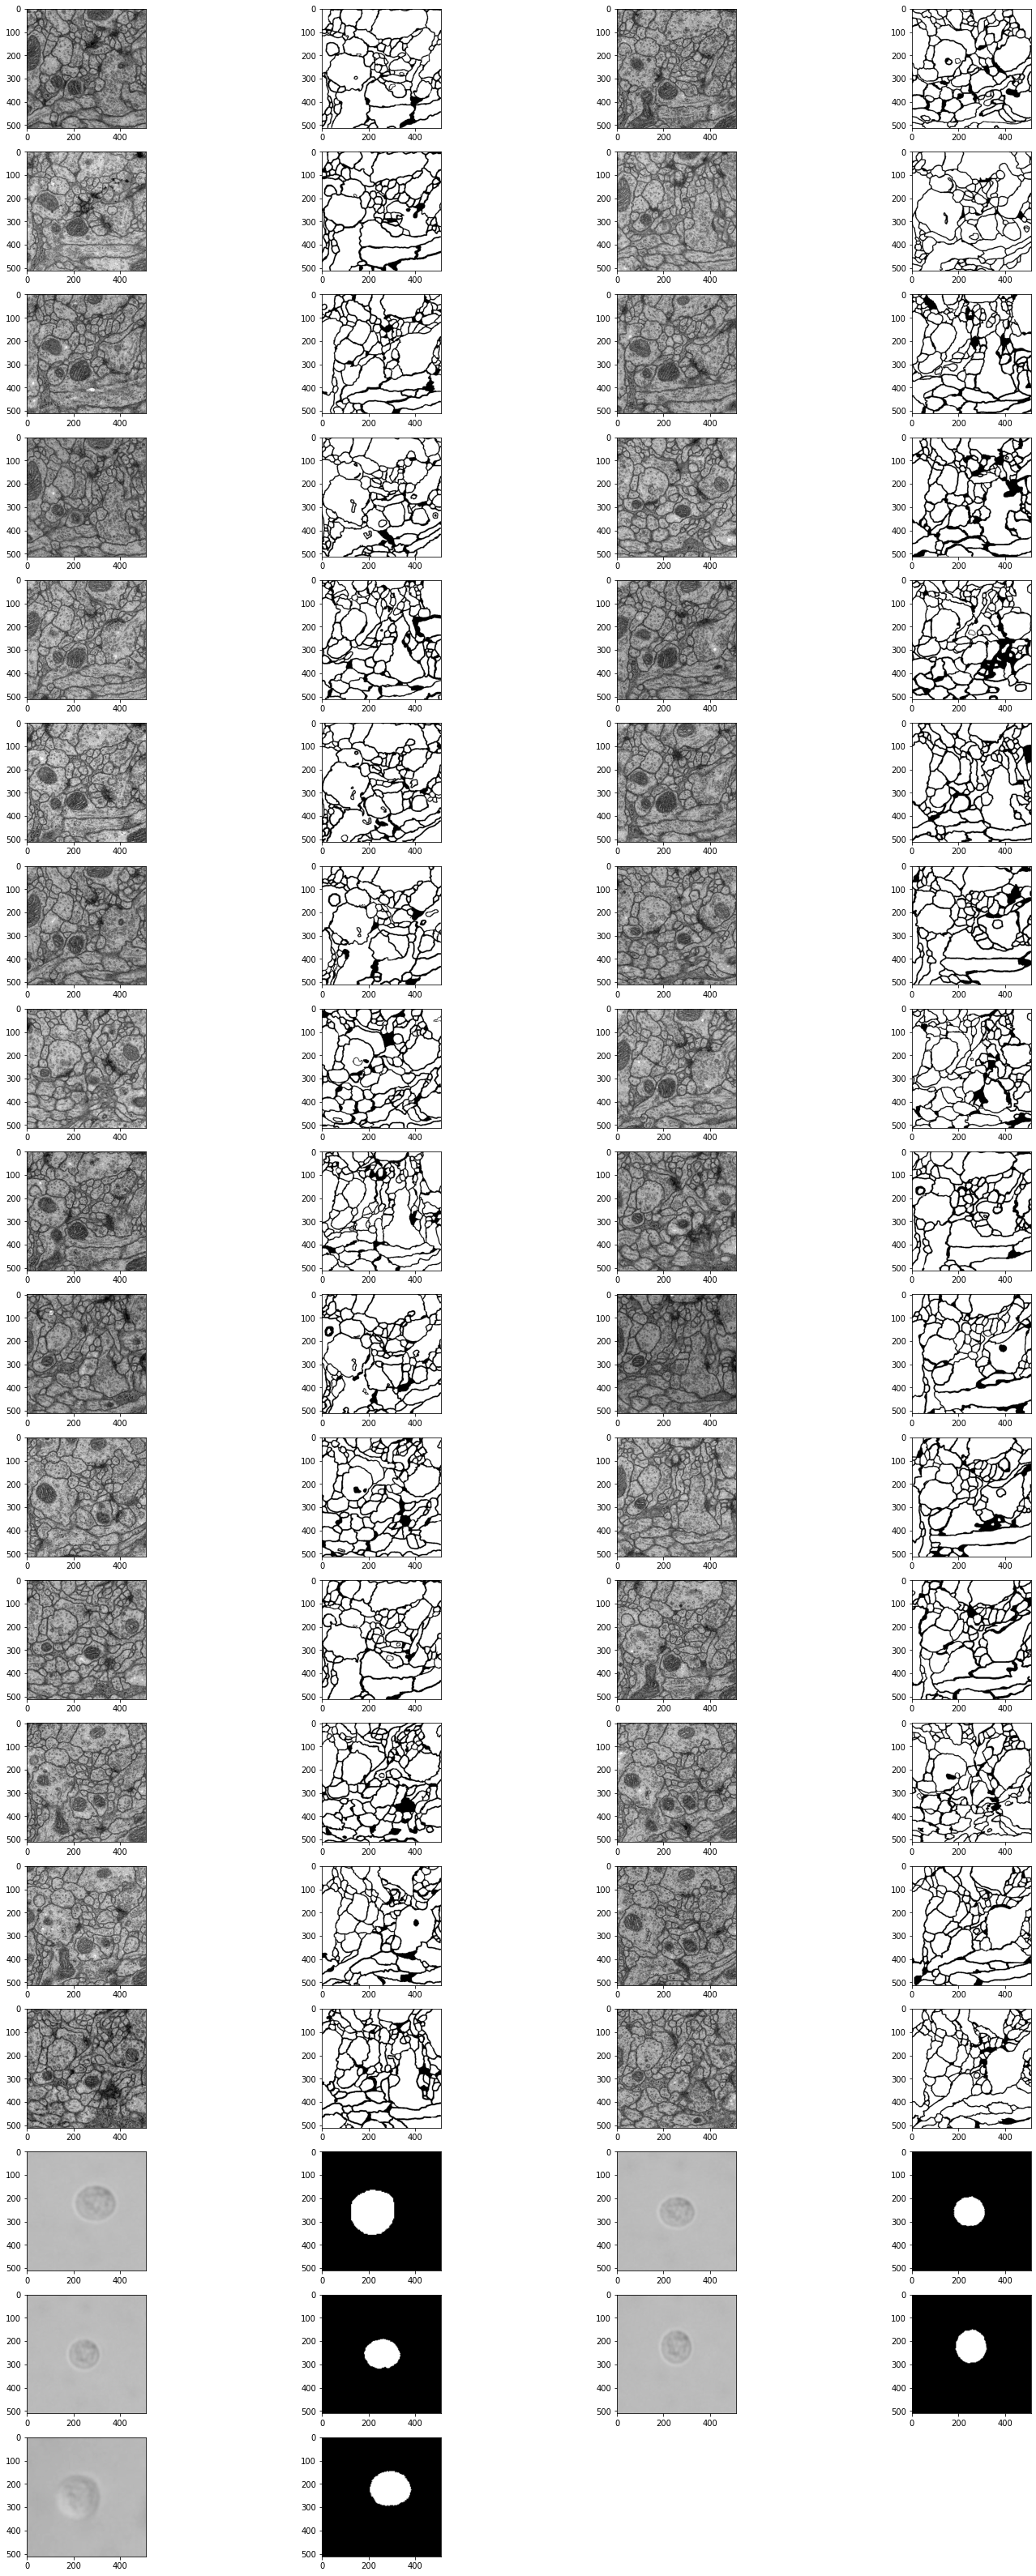

In [ ]:
fig = plt.figure(figsize = (25,100))
#  Categorical Data
a = 31  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter
for i in range(dataset.shape[0]):
    plt.subplot(a,b,c)
    plt.imshow(dataset[i],vmin=0, vmax=1,cmap='gray')
    c = c + 1
    plt.subplot(a,b,c)
    plt.imshow(label[i],vmin=0, vmax=1,cmap='gray')
    #plt.title(title[i])
    c = c + 1
    
plt.show()

In [ ]:
ds = dataset.reshape((35,512,512,1))
lb = label.reshape((35,512,512,1))
print(ds.shape)
print(lb.shape)

(35, 512, 512, 1)
(35, 512, 512, 1)


In [ ]:
# ds = image_generator(ds, batch_size = 32)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(ds, lb, test_size = 0.10)

In [ ]:
model = custom_unet(input_shape=(512, 512, 1),use_batch_norm = True,
                    num_classes=1,filters=64,dropout = 0.2,
                    output_activation = 'sigmoid')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 64  576         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=SGD(lr=0.1, momentum = 0.99),         
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:

print(y_train.shape)
print(x_train.shape)

(31, 512, 512, 1)
(31, 512, 512, 1)


In [ ]:
model.fit(x_train, y_train,
          batch_size=8, epochs=100,
          validation_split = 0.1
)

Epoch 1/100
4/4 [==============================] - 18s 2s/step - loss: 0.8152 - acc: 0.5665 - val_loss: 0.8354 - val_acc: 0.5777
Epoch 2/100
4/4 [==============================] - 3s 768ms/step - loss: 0.6150 - acc: 0.7197 - val_loss: 2.0965 - val_acc: 0.4292
Epoch 3/100
4/4 [==============================] - 3s 769ms/step - loss: 0.5944 - acc: 0.7376 - val_loss: 7.5317 - val_acc: 0.5695
Epoch 4/100
4/4 [==============================] - 3s 758ms/step - loss: 0.7812 - acc: 0.7052 - val_loss: 4.5222 - val_acc: 0.4290
Epoch 5/100
4/4 [==============================] - 3s 771ms/step - loss: 0.8558 - acc: 0.5131 - val_loss: 1.8055 - val_acc: 0.6124
Epoch 6/100
4/4 [==============================] - 3s 759ms/step - loss: 0.6208 - acc: 0.7410 - val_loss: 28.4142 - val_acc: 0.4290
Epoch 7/100
4/4 [==============================] - 3s 784ms/step - loss: 0.7117 - acc: 0.6856 - val_loss: 48.4648 - val_acc: 0.4290
Epoch 8/100
4/4 [==============================] - 3s 759ms/step - loss: 0.6396 - a

In [ ]:
predicted = model.predict(x_test)  
print(predicted.shape)
scores = model.evaluate(x_test, y_test, verbose=0)
print(scores)
predicted = predicted.reshape((4,512,512))
y_test = y_test.reshape((4,512,512))
print(predicted.shape)
print(y_test.shape)

(4, 512, 512, 1)
[0.8962926864624023, 0.7498207092285156]
(4, 512, 512)
(4, 512, 512)


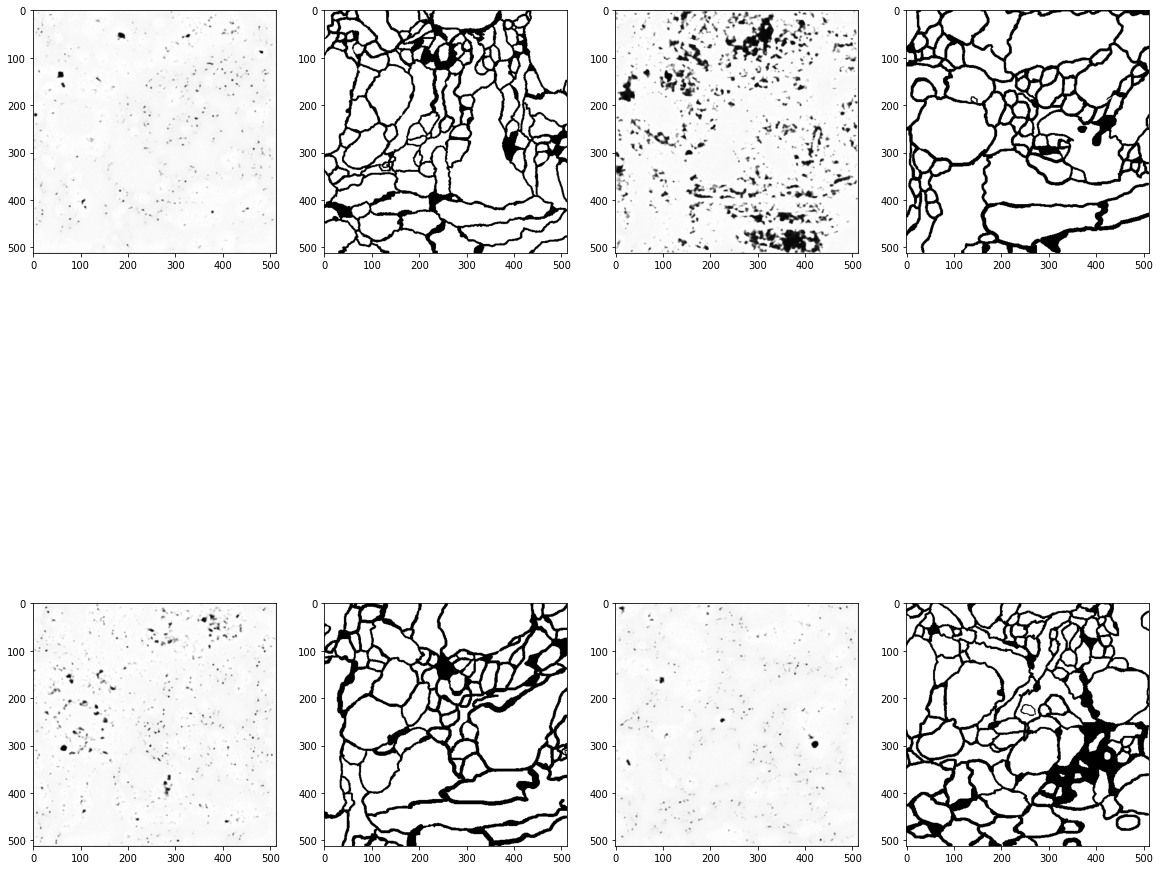

In [ ]:
fig = plt.figure(figsize = (20,20))
#  Categorical Data
a = 2  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter
for i in range(predicted.shape[0]):
    plt.subplot(a,b,c)
    plt.imshow(predicted[i],vmin=0, vmax=1,cmap='gray')
    c = c + 1
    plt.subplot(a,b,c)
    plt.imshow(y_test[i],vmin=0, vmax=1,cmap='gray')
    #plt.title([i])
    c = c + 1
    
plt.show()

In [ ]:
cancer  = np.zeros([512,512])


In [ ]:
image_directory = '/content/drive/MyDrive/Cancer_Dectetin/first/'
SIZE = 512


Error = os.listdir(image_directory )
for a in Error:    #Remember enumerate method adds a counter and returns the enumerate object
    image = Image.open(image_directory + a)
    image = image.convert('L') 
    image = image.resize((SIZE,SIZE))
    image = asarray(image)
    image = image/255
    cancer = np.append(cancer,image,axis = 0)


print(len(cancer))
print(cancer.shape)

5632
(5632, 512)


In [ ]:
cancer = cancer.reshape((11,512,512,1))
print(cancer.shape)
cancer = np.delete(cancer,0,0)
print(cancer.shape)


(11, 512, 512, 1)
(10, 512, 512, 1)


In [ ]:
predicted_1 = model.predict(cancer)  
print(predicted_1.shape)
predicted = predicted_1.reshape((10,512,512))
cancer = cancer.reshape((10,512,512))
print(predicted.shape)
print(cancer.shape)


(10, 512, 512, 1)
(10, 512, 512)
(10, 512, 512)


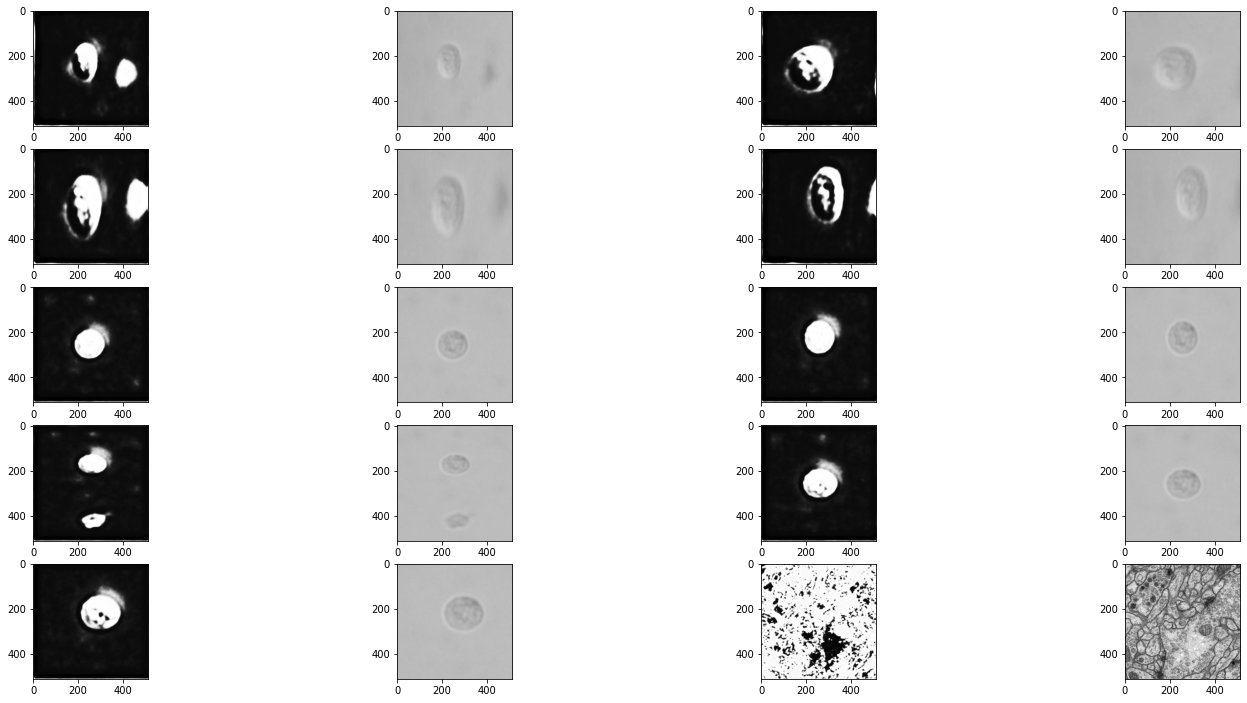

In [ ]:
fig = plt.figure(figsize = (25,25))
#  Categorical Data
a = 10  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter
for i in range(10):
    plt.subplot(a,b,c)
    plt.imshow(predicted[i],vmin=0, vmax=1,cmap='gray')
    c = c + 1
    plt.subplot(a,b,c)
    plt.imshow(cancer[i],vmin=0, vmax=1,cmap='gray')
    #plt.title([i])
    c = c + 1
    
plt.show()